In [105]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression

In [106]:
# convert the train data into a dataframe
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
# convert the test data into a dataframe
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [108]:
# describing the train set to get some insights into the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Isham, Miss. Ann Elizabeth",male,1601,B96 B98,S
freq,1,577,7,4,644


In [110]:
# checking the correlation between most dependent variables and the survival
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [111]:
# analyze how each variable correlates with Survival. I will disregards the variables Ticket and Cabin as they contain many unique values and there are lots of values missing. Age variable cannot be correlated like this since it is not an ordinal, cathegorical or discrete value as the ones below.
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [112]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [113]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [114]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [115]:
train_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


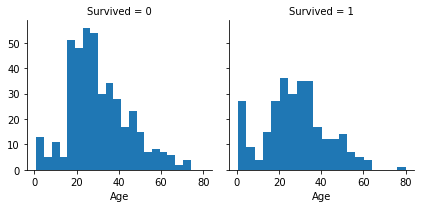

In [116]:
# for the Age variable, which is a continuous variable, I will group the values into bins and show the correlation with Survival through a histogram to show the frequency distribution of this variable.
# for this i will use the FaceGrid class of seaborn library which is great to use for plotting conditional relationships.
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


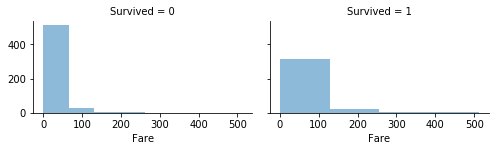

In [117]:
# I did the same for the Fare variable
g = sns.FacetGrid(train_data, col='Survived',size=2.2, aspect=1.6)
g.map(plt.hist, 'Fare', alpha=.5, bins=4)

In [118]:
# After analyzing the data set to determine which variables should I consider in my prediction algorithm, I proceede to do some data wranging
# First, I have replaced the gender values with 0 and 1 because I need integer variables to perform the logistic regression on
train_data['Sex'].replace(['male','female'],[0,1],inplace=True)
test_data['Sex'].replace(['male','female'],[0,1],inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [119]:
# I have created a dataframe with the dependent variables I have chosen for analysis
train_data=train_data[['PassengerId','Survived' ,'Pclass','Sex','Age', 'SibSp','Parch', 'Embarked', 'Fare']]
test_data=train_data[['PassengerId','Pclass','Sex','Age', 'SibSp','Parch', 'Embarked', 'Fare']]
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,1,0,3,0,22.0,1,0,S,7.2500
1,2,1,1,1,38.0,1,0,C,71.2833
2,3,1,3,1,26.0,0,0,S,7.9250
3,4,1,1,1,35.0,1,0,S,53.1000
4,5,0,3,0,35.0,0,0,S,8.0500


In [120]:
#  I have replaced the unkown values 
train_data.replace("?", np.nan, inplace = True)
missing_data = train_data.isnull()
missing_data.head(5)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [121]:
# checking how many values and for which variables are missing
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64

Fare
False    891
Name: Fare, dtype: int64



In [122]:
test_data.replace("?", np.nan, inplace = True)
missing_data_test = test_data.isnull()
for column in missing_data_test.columns.values.tolist():
    print(column)
    print (missing_data_test[column].value_counts())
    print("") 

PassengerId
False    891
Name: PassengerId, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64

Fare
False    891
Name: Fare, dtype: int64



In [123]:
# replacing the missing Age values with the average value
avg_age=train_data['Age'].astype('float').mean()
train_data['Age'].replace(np.nan, avg_age, inplace=True)
avg_age_test=test_data['Age'].astype('float').mean()
test_data['Age'].replace(np.nan, avg_age_test, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [124]:
# replacing the missing dock with dock C where most of the passengers embarked survived. Since only 2 values are missing, the replacing value doesn't really matter.
train_data['Embarked'].replace(np.nan, 'C', inplace=True)
test_data['Embarked'].replace(np.nan, 'C', inplace=True)

In [125]:
# replacing the Embarked variable with int values
train_data['Embarked'].replace(['S','C','Q'], [0,1,2],inplace=True)
test_data['Embarked'].replace(['S','C','Q'], [0,1,2],inplace=True)



In [126]:
median_fare=test_data['Fare'].astype('int').median()
test_data['Fare'].replace(np.nan, median_fare, inplace=True)

In [127]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,1,0,3,0,22.0,1,0,0,7.2500
1,2,1,1,1,38.0,1,0,1,71.2833
2,3,1,3,1,26.0,0,0,0,7.9250
3,4,1,1,1,35.0,1,0,0,53.1000
4,5,0,3,0,35.0,0,0,0,8.0500


In [128]:
# define X
X=np.asarray(train_data[['PassengerId','Pclass','Sex','Age', 'SibSp','Parch', 'Embarked', 'Fare']])
X_test=np.asarray(test_data[['PassengerId','Pclass','Sex','Age', 'SibSp','Parch', 'Embarked', 'Fare']])
X

array([[  1.    ,   3.    ,   0.    , ...,   0.    ,   0.    ,   7.25  ],
       [  2.    ,   1.    ,   1.    , ...,   0.    ,   1.    ,  71.2833],
       [  3.    ,   3.    ,   1.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [889.    ,   3.    ,   1.    , ...,   2.    ,   0.    ,  23.45  ],
       [890.    ,   1.    ,   0.    , ...,   0.    ,   1.    ,  30.    ],
       [891.    ,   3.    ,   0.    , ...,   0.    ,   2.    ,   7.75  ]])

In [129]:
# define Y
Y=np.asarray(train_data[['Survived']])
Y

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [130]:
# fit the model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,Y)
LR

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
# predict who survived in the test data
Y_test=LR.predict(X_test)
Y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [133]:
# evaluate model accurancy with jaccard similarity score
acc_log = round(LR.score(X, Y) * 100, 2)
acc_log


73.63

In [134]:
Y_test=pd.DataFrame(Y_test)
test_data['Survived']=Y_test.values
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare,Survived
0,1,3,0,22.0,1,0,0,7.2500,0
1,2,1,1,38.0,1,0,1,71.2833,1
2,3,3,1,26.0,0,0,0,7.9250,0
3,4,1,1,35.0,1,0,0,53.1000,1
4,5,3,0,35.0,0,0,0,8.0500,0


In [135]:
test_data.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare,Survived
PassengerId,1.000000,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,-0.030444,0.012658,0.051675
Pclass,-0.035144,1.000000,-0.131900,-0.331339,0.083081,0.018443,0.040138,-0.549500,-0.540989
Sex,-0.042939,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.121266,0.182333,0.448115
Age,0.033207,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.012971,0.091566,-0.061491
SibSp,-0.057527,0.083081,0.114631,-0.232625,1.000000,0.414838,-0.061591,0.159651,0.002373
Parch,-0.001652,0.018443,0.245489,-0.179191,0.414838,1.000000,-0.080277,0.216225,0.194129
Embarked,-0.030444,0.040138,0.121266,0.012971,-0.061591,-0.080277,1.000000,0.065492,0.124675
Fare,0.012658,-0.549500,0.182333,0.091566,0.159651,0.216225,0.065492,1.000000,0.610895
Survived,0.051675,-0.540989,0.448115,-0.061491,0.002373,0.194129,0.124675,0.610895,1.000000
